In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from generateWordFrequency import *
from naiveBayes import *
from fileWriteFunctions import *

In [2]:
def drawPlot(X,Y,xlabel,ylabel,title):
    plt.figure()
    plt.scatter(X, Y, marker='*',
           s=10, facecolor='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

## COMMON DATA LOADING 

In [3]:
AllClasses = ['story', 'ask_hn', 'show_hn', 'poll']
appendClassPrefix = 'prob_'

unfilteredTrainData = getDataframe(2018)
unfilteredTrainData = addTokenizedColumnofTitle(unfilteredTrainData)

unfilteredTestData = getDataframe(2019)
unfilteredTestData = addTokenizedColumnofTitle(unfilteredTestData)
unfilteredTestData = unfilteredTestData.reset_index()

In [6]:
def generateModel(trainData, delta, filename = 'temp-model.txt'):
    priorProbabilities = getPriorProbabilities(trainData)
    trainWords = getWordFrequencyDataframe(trainData,AllClasses)
    trainWords = obtainDataframeWithClassProbabilities(trainWords, AllClasses, delta, appendClassPrefix)
    writeModel(trainWords,filename,AllClasses,appendClassPrefix)
    trainWords = renameModelRows(trainWords, AllClasses, appendClassPrefix)
    model = [trainWords, priorProbabilities]
    return model

def testModel(testData, model, filename = 'temp-results.txt'):
    testData = generateCondClassProb(testData, model)
    testData['predicted'] = generatePrediction(testData,AllClasses)
    testResults = comparePredictions(testData,AllClasses)
    writeDataframe(testResults,filename)
    check = testResults.comparision.value_counts()
    accuracy = check[True]/(check[True]+check[False])
    return accuracy

## TASK 1:  Extract the data and build the model

In [7]:
trainData = unfilteredTrainData.copy()
model = generateModel(trainData, 0.5, 'model-2018.txt')

## TASK 2: Use ML Classifier to test dataset

In [8]:
testData = unfilteredTestData.copy()
accuracy = testModel(testData, model, 'baseline-result.txt')
print('accuracy:',accuracy)

accuracy: 0.9913784936049266


## Task 3: Experiments with the classifier

### EXP 3.1:  Stop-word Filtering

In [9]:
filename = 'Stopwords.txt'
with open (filename, "r") as myfile:
    data = myfile.readlines()
filteredWordList = [word[0:-1] for word in data if len(word[0:-1])]
trainData = filterTokensByWordList(unfilteredTrainData.copy(),filteredWordList)
testData = filterTokensByWordList(unfilteredTestData.copy(),filteredWordList)
model = generateModel(trainData, 0.5, 'stopword-model.txt')
accuracy = testModel(testData, model, 'stopword-result.txt')
print(accuracy)

0.9953212112378385


### EXP 3.2:   Word Length Filtering

In [10]:
trainData = filterTokensByWordLength(unfilteredTrainData.copy())
testData = filterTokensByWordLength(unfilteredTestData.copy())
model = generateModel(trainData, 0.5, 'wordlength-model.txt')
accuracy = testModel(testData, model, 'wordlength-result.txt')
print(accuracy)

0.989971941843093


### EXP 3.3: Infrequent Word Filtering

#### 3.3.1 COUNT BASED

1 0.9781146376125059 64569
5 0.966308348212659 19193
10 0.966417665707102 11745
15 0.9671245855045002 8828
20 0.9679335349633786 7209


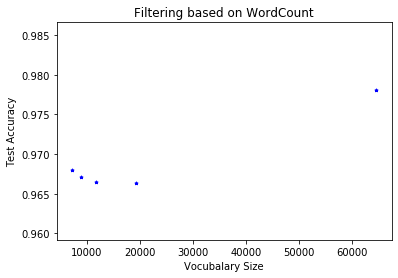

In [11]:
accuracies = []
VocabularySize = []
for count in [1,5,10,15,20]:
    trainWords = getWordFrequencyDataframe(unfilteredTrainData,AllClasses)
    filteredWordList = getWordListBasedOnCount(trainWords,maxCount = count)    
    trainData = filterTokensByWordList(unfilteredTrainData.copy(),filteredWordList)
    testData = filterTokensByWordList(unfilteredTestData.copy(),filteredWordList)
    model = generateModel(trainData, 0.5)
    accuracy = testModel(testData, model)
    vocabSize = len(model[0].columns)    
    accuracies.append(accuracy)
    VocabularySize.append(vocabSize)
    print(count,accuracy,vocabSize)
drawPlot(VocabularySize,accuracies,'Vocubalary Size','Test Accuracy','Filtering based on WordCount')

#### 3.3.2 TOP X % FREQUENT WORDS

5 0.9247239733265313 209665
10 0.9245855045002369 198630
15 0.9244907626717196 187595
20 0.9245053383376453 176560
25 0.9244543235069053 165525


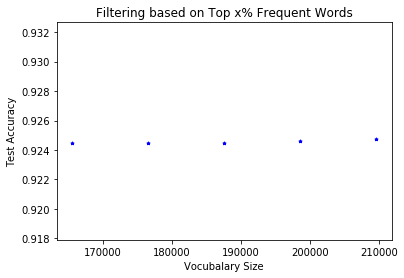

In [12]:
accuracies = []
VocabularySize = []
for percent in [5,10,15,20,25]:
    trainWords = getWordFrequencyDataframe(unfilteredTrainData,AllClasses)
    filteredWordList = getWordListBasedOnPercent(trainWords,Percent = percent)
    trainData = filterTokensByWordList(unfilteredTrainData.copy(),filteredWordList)
    testData = filterTokensByWordList(unfilteredTestData.copy(),filteredWordList)
    model = generateModel(trainData, 0.5)
    accuracy = testModel(testData, model)
    vocabSize = len(model[0].columns)    
    accuracies.append(accuracy)
    VocabularySize.append(vocabSize)
    print(percent,accuracy,vocabSize)
drawPlot(VocabularySize,accuracies,'Vocubalary Size','Test Accuracy','Filtering based on Top x% Frequent Words')

### EXP 3.3: Delta Smoothening

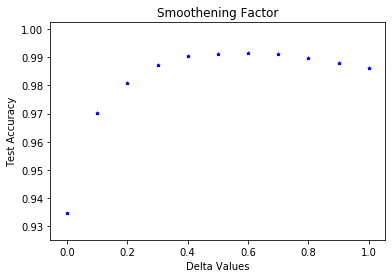

In [13]:
accuracies = []
Deltas = 0.1*np.arange(0,11)
for delta in Deltas:
    trainData = unfilteredTrainData.copy()
    testData = unfilteredTestData.copy()    
    model = generateModel(trainData, delta)
    accuracy = testModel(testData, model)    
    accuracies.append(accuracy)
drawPlot(Deltas,accuracies,'Delta Values','Test Accuracy','Smoothening Factor')